# Módulo 6 tarefa 3

#### 1) A base 'sinasc_RO_2019.csv' contém dados do sistema de nascidos vivos do DataSUS, cujo dicionário de dados está no arquivo 'Estrutura_SINASC_para_CD.pdf'. Carregue esse arquivo.

### Importando as Bibliotecas 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# %matplotlib notebook

### Importando a base de dados (SINASC_RO_2019.csv)

In [2]:
df = pd.read_csv('SINASC_RO_2019.csv')
df.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


In [3]:
# Verificando a nomeclatura das colunas 
df.columns

Index(['ORIGEM', 'CODESTAB', 'CODMUNNASC', 'LOCNASC', 'IDADEMAE', 'ESTCIVMAE',
       'ESCMAE', 'CODOCUPMAE', 'QTDFILVIVO', 'QTDFILMORT', 'CODMUNRES',
       'GESTACAO', 'GRAVIDEZ', 'PARTO', 'CONSULTAS', 'DTNASC', 'HORANASC',
       'SEXO', 'APGAR1', 'APGAR5', 'RACACOR', 'PESO', 'IDANOMAL', 'DTCADASTRO',
       'CODANOMAL', 'NUMEROLOTE', 'VERSAOSIST', 'DTRECEBIM', 'DIFDATA',
       'DTRECORIGA', 'NATURALMAE', 'CODMUNNATU', 'CODUFNATU', 'ESCMAE2010',
       'SERIESCMAE', 'DTNASCMAE', 'RACACORMAE', 'QTDGESTANT', 'QTDPARTNOR',
       'QTDPARTCES', 'IDADEPAI', 'DTULTMENST', 'SEMAGESTAC', 'TPMETESTIM',
       'CONSPRENAT', 'MESPRENAT', 'TPAPRESENT', 'STTRABPART', 'STCESPARTO',
       'TPNASCASSI', 'TPFUNCRESP', 'TPDOCRESP', 'DTDECLARAC', 'ESCMAEAGR1',
       'STDNEPIDEM', 'STDNNOVA', 'CODPAISRES', 'TPROBSON', 'PARIDADE',
       'KOTELCHUCK', 'CONTADOR', 'munResStatus', 'munResTipo', 'munResNome',
       'munResUf', 'munResLat', 'munResLon', 'munResAlt', 'munResArea'],
      dtype='object')

#### 2) Categorize a variável APGAR5 conforme as seguintes quebras:

- 0 a 3: 'asfixia grave'
- 4 a 5: 'asfixia moderada'
- 6 a 7: 'asfixia leve'
- 8 a 10: 'normal'

In [7]:
# Definir as categorias e rótulos
categorias = pd.cut(df['APGAR5'], bins=[0, 3, 5, 7, 10], 
                    labels=['asfixia grave', 'asfixia moderada', 'asfixia leve', 'normal'])

# Adicionar a nova coluna ao DataFrame
df['APGAR5_categoria'] = categorias

# Verificar o resultado
print(df[['APGAR5', 'APGAR5_categoria']].head())



   APGAR5 APGAR5_categoria
0    10.0           normal
1     9.0           normal
2    10.0           normal
3    10.0           normal
4    10.0           normal


#### 3) Monte um gráfico comparando a distribuição de APGAR5 por sexo para cada grupo de tempo de gestação (GESTACAO).

<Axes: xlabel='GESTACAO', ylabel='APGAR5'>

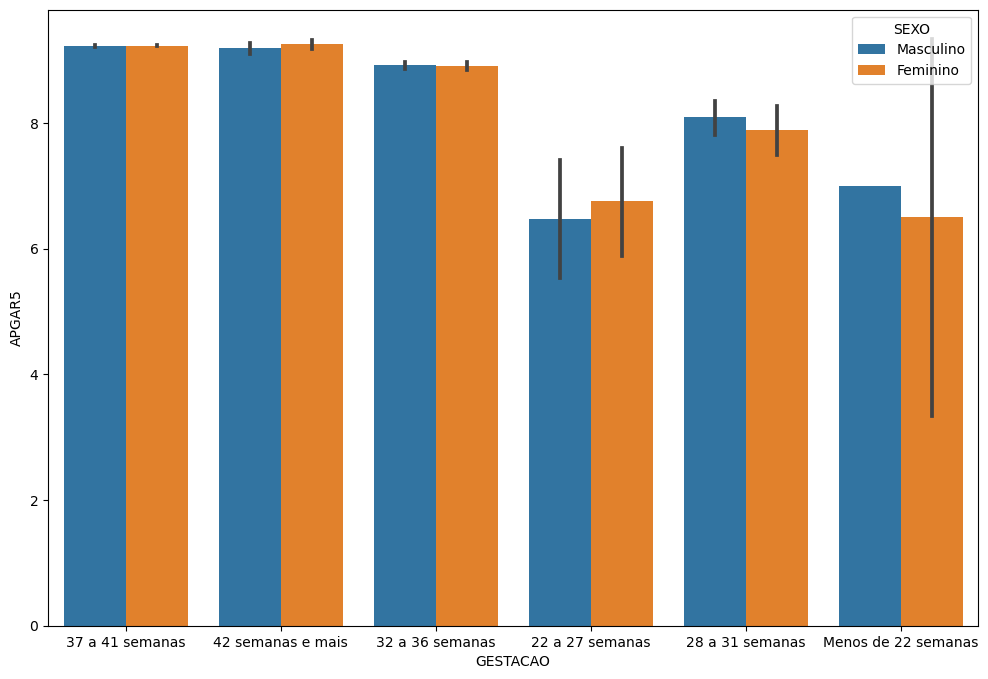

In [8]:
# Visualização do gráfico de barras (barplot) comparação (masculino e feminino)
plt.figure(figsize=(12, 8))
sns.barplot(x='GESTACAO', y='APGAR5', hue='SEXO', data=df)

####  4) Monte uma tabela cruzada com APGAR5 nas colunas e GESTACAO nas linhas

In [11]:
# APGAR5_CROSS Tabela cruzada
APGAR5_CROSS = pd.crosstab(df['GESTACAO'], df['APGAR5_categoria'])
APGAR5_CROSS

APGAR5_categoria,asfixia grave,asfixia moderada,asfixia leve,normal
GESTACAO,,,,
22 a 27 semanas,14,1,12,51
28 a 31 semanas,3,12,18,129
32 a 36 semanas,6,19,73,2134
37 a 41 semanas,28,28,196,22266
42 semanas e mais,0,1,6,690
Menos de 22 semanas,1,0,1,4


####  5) Da tabela cruzada do item anterior, calcule os percentuais de linha. Ou seja, a distribuição da variável APGAR5 para cada classe de GESTACAO dado.

In [12]:
# Contagem das tabela cruzada 
APGAR5_CROSS.sum(axis = 1)

GESTACAO
22 a 27 semanas           78
28 a 31 semanas          162
32 a 36 semanas         2232
37 a 41 semanas        22518
42 semanas e mais        697
Menos de 22 semanas        6
dtype: int64

In [16]:
# Verificando om percentual da APGAR5_CROSS
Perc_APGAR5_CROSS = APGAR5_CROSS.div(APGAR5_CROSS.sum(axis = 1), axis = 0)
Perc_APGAR5_CROSS

APGAR5_categoria,asfixia grave,asfixia moderada,asfixia leve,normal
GESTACAO,,,,
22 a 27 semanas,17.948718,1.282051,15.384615,65.384615
28 a 31 semanas,1.851852,7.407407,11.111111,79.629630
32 a 36 semanas,0.268817,0.851254,3.270609,95.609319
37 a 41 semanas,0.124345,0.124345,0.870415,98.880895
42 semanas e mais,0.000000,0.143472,0.860832,98.995696
Menos de 22 semanas,16.666667,0.000000,16.666667,66.666667


####  6) Os médicos costumam classificar parto prematuro quando a gestação tem menos que 37 semanas. Faça um gráfico de barras da tabela cruzada acima e conclua se você acha que este conjunto de dados corrobora ou não com a afirmação dos médicos.

In [17]:
# Verificação da tabela cruzada (Perc_APGAR5_CROSS)
Perc_APGAR5_CROSS.sum(axis=1)


GESTACAO
22 a 27 semanas        100.0
28 a 31 semanas        100.0
32 a 36 semanas        100.0
37 a 41 semanas        100.0
42 semanas e mais      100.0
Menos de 22 semanas    100.0
dtype: float64

<Axes: xlabel='GESTACAO'>

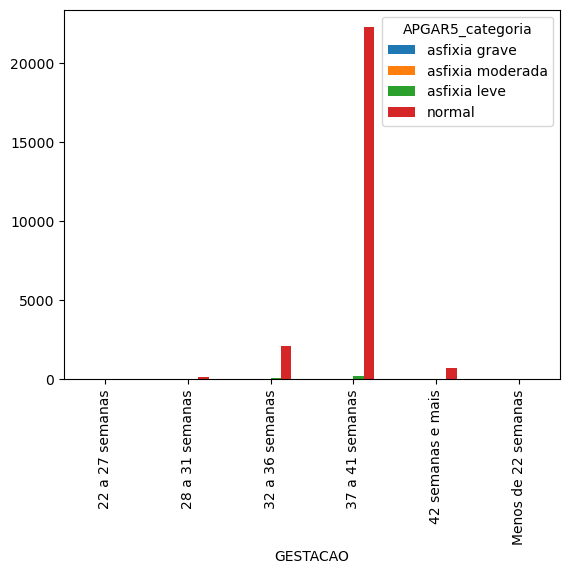

In [20]:
# Montando um gráfico da distribuição da tabela cruzada
APGAR5_CROSS.plot(kind='bar')

#### 7) Veja se há relação entre APGAR5 e o peso do bebê. Isso pode ser feito de diversas formas. Fique à vontade para escolher a melhor maneira na sua opinião, ou até testar mais de um dos gráficos que vimos. Fique à vontade também para consultar a documentação e utilizar algum outro recurso se achar conveniente.

In [30]:
df.describe


<bound method NDFrame.describe of        ORIGEM   CODESTAB  CODMUNNASC  LOCNASC  IDADEMAE  ESTCIVMAE  \
0           1  2679477.0      110001        1        19        5.0   
1           1  2679477.0      110001        1        29        2.0   
2           1  2679477.0      110001        1        37        9.0   
3           1  2516500.0      110001        1        30        5.0   
4           1  2516500.0      110001        1        30        2.0   
...       ...        ...         ...      ...       ...        ...   
27023       1  2604388.0      510340        1        32        2.0   
27024       1  2752654.0      510675        1        19        1.0   
27025       1  9659366.0      510787        1        24        2.0   
27026       1  9659366.0      510787        1        21        2.0   
27027       1  2795655.0      510792        1        18        5.0   

                ESCMAE  CODOCUPMAE  QTDFILVIVO  QTDFILMORT  ...  CONTADOR  \
0          8 a 11 anos         NaN         0.0  

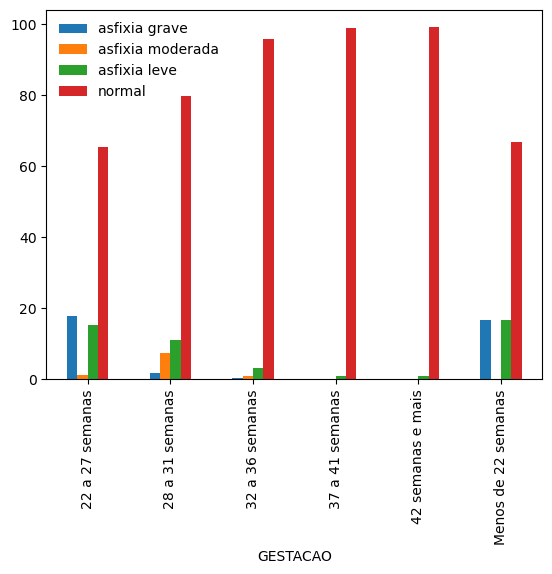

In [21]:
# Montando um gráfico da distribuição em porcentagem da tabela cruzada
Perc_APGAR5_CROSS.plot(kind='bar').legend(loc='upper left', frameon = False)

<Axes: xlabel='APGAR5', ylabel='PESO'>

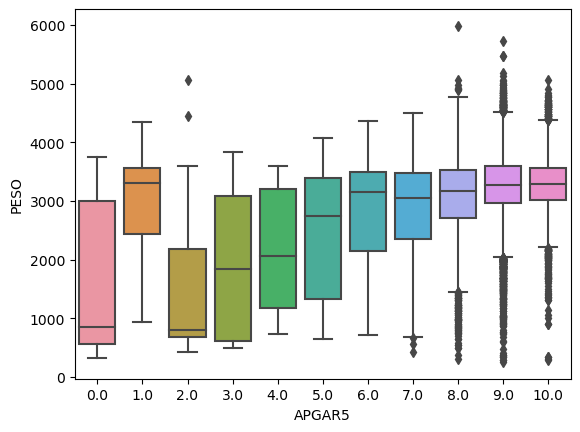

In [22]:
#Perc_APGAR5_CROSS

sns.boxplot(x='APGAR5', y='PESO', data=df)

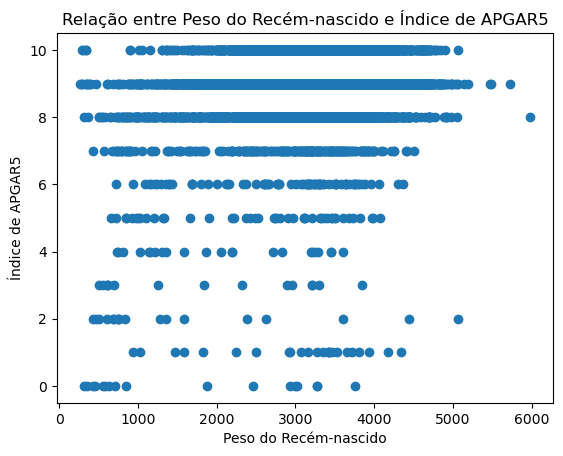

In [26]:
import matplotlib.pyplot as plt

plt.scatter(df['PESO'], df['APGAR5'])
plt.xlabel('Peso do Recém-nascido')
plt.ylabel('Índice de APGAR5')
plt.title('Relação entre Peso do Recém-nascido e Índice de APGAR5')
plt.show()


In [27]:
correlation = df['PESO'].corr(df['APGAR5'])
print(f"Coeficiente de correlação entre PESO e APGAR5: {correlation}")


Coeficiente de correlação entre PESO e APGAR5: 0.16821001802434676


In [28]:
# Exemplo de análise de grupo
grupo_peso = pd.cut(df['PESO'], bins=3)  # Dividindo em 3 grupos de peso
df.groupby(grupo_peso)['APGAR5'].mean()  # Calculando a média de APGAR5 para cada grupo de peso


PESO
(252.273, 2167.0]    8.227122
(2167.0, 4076.0]     9.216832
(4076.0, 5985.0]     9.114336
Name: APGAR5, dtype: float64

## Insights

### O coeficiente de correlação de 0.168 entre o peso do recém-nascido e o índice de APGAR5 indica uma correlação muito fraca entre essas duas variáveis. 

### Podemos considerar:  

   ### 1.  Fraca correlação: A correlação próxima a zero sugere que não há uma relação linear forte entre o peso do recém-nascido e o índice de APGAR5. Isso significa que o peso do bebê no momento do nascimento não é um preditor forte do seu estado de saúde conforme medido pelo APGAR5.

   ### 2. Outros fatores: A fraca correlação pode sugerir que outros fatores além do peso do recém-nascido têm um impacto maior no índice de APGAR5. Isso pode incluir fatores como condições pré-natais, complicações durante o parto, saúde da mãe, entre outros.

   ### 3. Consideração adicional: Embora a correlação seja fraca, isso não significa necessariamente que o peso do bebê seja irrelevante para o índice de APGAR5. Pode haver uma relação não linear ou interações complexas entre o peso do recém-nascido e outros fatores que influenciam o índice de APGAR5.

  ### 4. Exploração adicional: Mesmo com uma correlação fraca, ainda pode ser útil explorar visualmente a relação entre o peso do bebê e o índice de APGAR5 usando gráficos de dispersão ou análises de grupo, como mencionado anteriormente. Isso pode revelar padrões ou tendências que não são capturados apenas pelo coeficiente de correlação.

### Em resumo, um coeficiente de correlação de 0.168 sugere uma relação muito fraca entre o peso do recém-nascido e o índice de APGAR5. Isso indica que outras variáveis provavelmente desempenham um papel mais significativo na determinação do estado de saúde do recém-nascido ao nascer.